In [1]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import utils 
import warnings
from sklearn.model_selection import train_test_split
import spacy


d:\Proyectos\TESIS 2024\depression_detection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Se leen los datos y se seleccionan las variables que presentan una diferencia
# entre los individuos que presentan estres y los que no
data_path = Path(os.getcwd()).parent / "data"
silver_path = data_path / "silver" / "dreadditClean.csv"
df = pd.read_csv(silver_path).reset_index(drop=True)

In [3]:
#df = df.head()
# Cargar el modelo de lenguaje
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1837747


In [4]:
corpus_all = " ".join(df.clean_text.to_list())

In [5]:
doc = nlp(corpus_all)
freq_all_words = utils.word_freq(nlp(doc))
freq_all_words = pd.DataFrame.from_dict(freq_all_words, orient="index").reset_index()
freq_all_words.columns =["word","count"]
freq_all_words = freq_all_words.sort_values("count", ascending=False).head(10)

In [6]:
corpus_stress = " ".join(df.query("label==1").clean_text.to_list())

In [7]:
doc = nlp(corpus_stress)
freq_stress = utils.word_freq(nlp(doc))
freq_stress = pd.DataFrame.from_dict(freq_stress, orient="index").reset_index()
freq_stress.columns =["word","count"]
freq_stress = freq_stress.sort_values("count", ascending=False).head(10)

In [8]:
corpus_no_stress = " ".join(df.query("label==0").clean_text.to_list())

In [9]:
doc = nlp(corpus_no_stress)
freq_no_stress = utils.word_freq(nlp(doc))
freq_no_stress = pd.DataFrame.from_dict(freq_no_stress, orient="index").reset_index()
freq_no_stress.columns =["word","count"]
freq_no_stress = freq_no_stress.sort_values("count", ascending=False).head(10)

In [10]:
#Configuracion de visualizaciones 

# Configurar el estilo de fondo con una cuadrícula
sns.set_style("whitegrid")

# Establecer una paleta de colores profesional
sns.set_palette(['#2596be'])

# Configurar la tipografía y el tamaño de la fuente
sns.set_context("paper", font_scale=1.5, rc={"font.family": "sans-serif", "font.sans-serif": ["Helvetica", "Arial"]})

# Desactivar spines innecesarios
sns.despine(trim=True, left=True);

<Figure size 640x480 with 0 Axes>

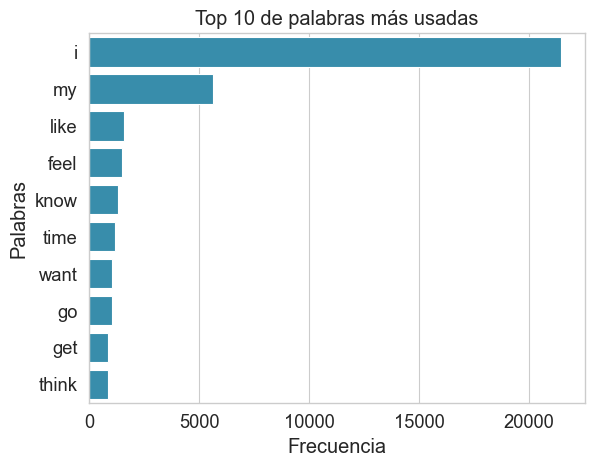

In [11]:
#Palabras más usadas
g = sns.barplot(x="count", y="word", data=freq_all_words)
g.set_title("Top 10 de palabras más usadas")
g.set_xlabel("Frecuencia")
g.set_ylabel("Palabras");

C:\Users\franc\AppData\Local\Temp\ipykernel_16844\4138525173.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="count", y="word", data=freq_stress, ax=axes[0], palette=colors_stress)
C:\Users\franc\AppData\Local\Temp\ipykernel_16844\4138525173.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="count", y="word", data=freq_no_stress, ax=axes[1], palette=colors_no_stress)


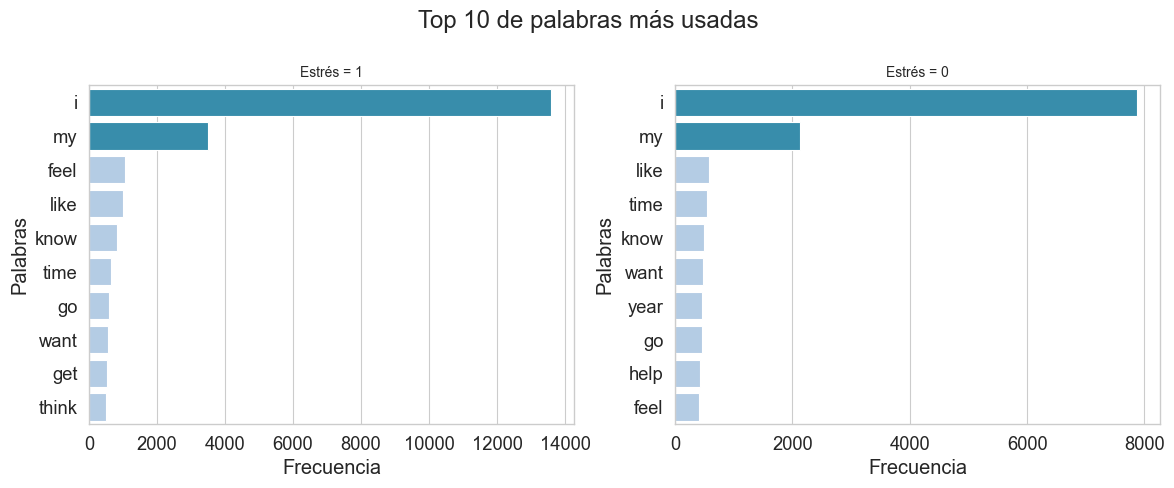

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palabras que deben tener un color especial
special_words = ['i', 'me', 'my', 'mine', 'myself']

# Función para aplicar colores
def assign_colors(words, special_words, color_special, color_default):
    return [color_special if word in special_words else color_default for word in words]

# Colores por defecto y especial
default_color = '#acccec'  # Azul por defecto
special_color = '#2596be'  

# Aplicar la función de asignación de colores
colors_stress = assign_colors(freq_stress['word'], special_words, special_color, default_color)
colors_no_stress = assign_colors(freq_no_stress['word'], special_words, special_color, default_color)

### Paso 2: Crear la visualización

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Top 10 de palabras más usadas")

# Gráfico para datos con estrés
ax1 = sns.barplot(x="count", y="word", data=freq_stress, ax=axes[0], palette=colors_stress)
ax1.set_title('Estrés = 1', size=10)
ax1.set_xlabel("Frecuencia")
ax1.set_ylabel("Palabras")

# Gráfico para datos sin estrés
ax2 = sns.barplot(x="count", y="word", data=freq_no_stress, ax=axes[1], palette=colors_no_stress)
ax2.set_title('Estrés = 0', size=10)
ax2.set_xlabel("Frecuencia")
ax2.set_ylabel("Palabras")

plt.tight_layout()
plt.show()


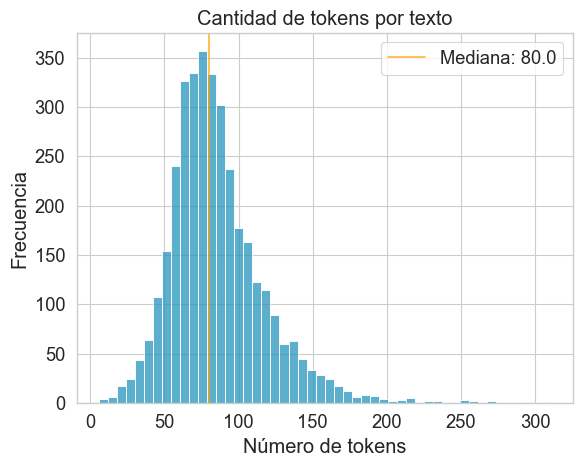

In [13]:
#distribucion de numero de tokens por texto
g = sns.histplot(x="token_count", data=df, bins=50)
plt.axvline(df["token_count"].median(), color="orange", alpha=0.8, linestyle="-", label= f"Mediana: {df['token_count'].median()}")
plt.legend(loc='upper right')
g.set_title("Cantidad de tokens por texto")
g.set_xlabel("Número de tokens")
g.set_ylabel("Frecuencia");

Text(0, 0.5, 'Registros')

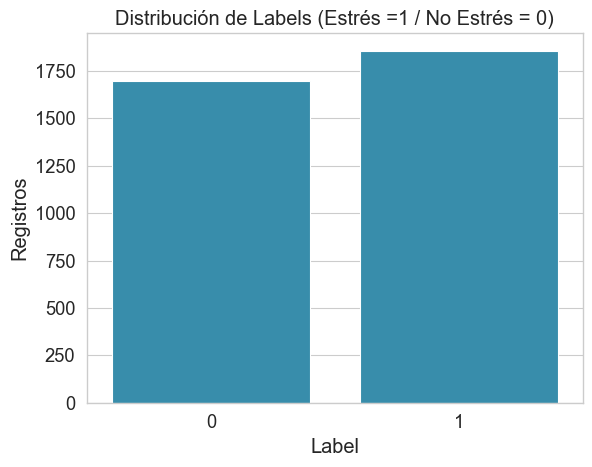

In [14]:
#distribucion de categorias en el label
label_dis = df.label.value_counts().reset_index()

g = sns.barplot(x="label", y="count", data=label_dis)
g.set_title("Distribución de Labels (Estrés =1 / No Estrés = 0)")
g.set_xlabel("Label")
g.set_ylabel("Registros")

In [15]:
df.shape

(3549, 6)